# Breast Cancer Wisconsin (Diagnostic) Data Analysis

## Overview

This project aims to leverage data science and machine learning methodologies to address a critical real-world problem: the diagnosis of breast cancer as benign or malignant. Utilizing the Breast Cancer Wisconsin (Diagnostic) Data Set, we will apply various predictive modeling techniques to accurately classify cases. Our objective is to formulate a meaningful commercial question, select and implement appropriate machine learning models, and evaluate their impact on the diagnosis process, potentially contributing to commercial success in the medical field.

## Data Set

The data set features were computed from digitized images of fine needle aspirates (FNA) of breast masses, describing characteristics of the cell nuclei present. Originating from the UCI Machine Learning Repository and also available through the UW CS ftp server, it includes data on 569 samples with 32 attributes each, detailing aspects such as radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, and fractal dimension of cell nuclei.

**Attributes:**
Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none


Data Source: [Breast Cancer Wisconsin (Diagnostic) Data Set on Kaggle](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data)

## Project Structure

- **Data Exploration:** Initial analysis to understand the dataset's characteristics and distribution.
- **Preprocessing:** Data cleaning and normalization to prepare for model training.
- **Model Selection:** Evaluating various machine learning models to find the most suitable for our data and objective.
- **Model Training and Evaluation:** Implementing the selected model using Python and Jupyter Notebooks, followed by rigorous evaluation to assess its performance.
- **Impact Analysis:** Assessing the model's commercial impact, particularly its potential to improve breast cancer diagnosis.

## Tools and Technologies

- **Python:** The primary programming language for data analysis and machine learning model implementation.
- **Jupyter Notebooks:** For interactive code execution, visualization, and documentation.
- **Pandas & NumPy:** For data manipulation and numerical computation.
- **Scikit-learn:** For applying machine learning algorithms.
- **Matplotlib & Seaborn:** For data visualization.

## Getting Started

To begin working with this project, you will need to have Python installed on your system, along with Jupyter Notebooks. The data set can be downloaded from the Kaggle link provided above. Ensure you have the necessary libraries installed:

```bash
pip install numpy pandas matplotlib seaborn scikit-learn jupyter


### Preprocessing:

The dataset consists of 569 entries with 32 features, including a diagnosis label (M = malignant, B = benign) and a variety of measurements related to the breast mass properties. All features are numerical, except for the diagnosis label, which is categorical. It appears there are no missing values in the dataset except for the last column (Unnamed: 32), which is entirely NaN and likely an artifact of the data export process. Thus, it should be removed.

Preprocessing Steps:
Remove Unnecessary Columns: The Unnamed: 32 column and the id column should be removed as they do not contribute to the analysis.
Encode Categorical Data: The diagnosis column should be encoded into numerical values (e.g., M = 1, B = 0) to facilitate model processing.
Feature Scaling: Standardize the features to have a mean of 0 and a standard deviation of 1, ensuring uniformity in scale. This step is crucial for clustering algorithms to perform optimally.

In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset from the specified file path
data_path = 'cancer_data.csv'  # Update this to your actual data file path
data = pd.read_csv(data_path)

# Remove unnecessary columns ('Unnamed: 32' and 'id')
data_cleaned = data.drop(columns=['id', 'Unnamed: 32'])

# Encode the 'diagnosis' column to numeric values (M = 1, B = 0)
label_encoder = LabelEncoder()
data_cleaned['diagnosis'] = label_encoder.fit_transform(data_cleaned['diagnosis'])

# Separate features and the target variable
features = data_cleaned.drop(columns='diagnosis')
target = data_cleaned['diagnosis']

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Convert the scaled features back to a DataFrame for better readability
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)

# Display the first few rows of the preprocessed data
features_scaled_df.head()


/Users/avielstein/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


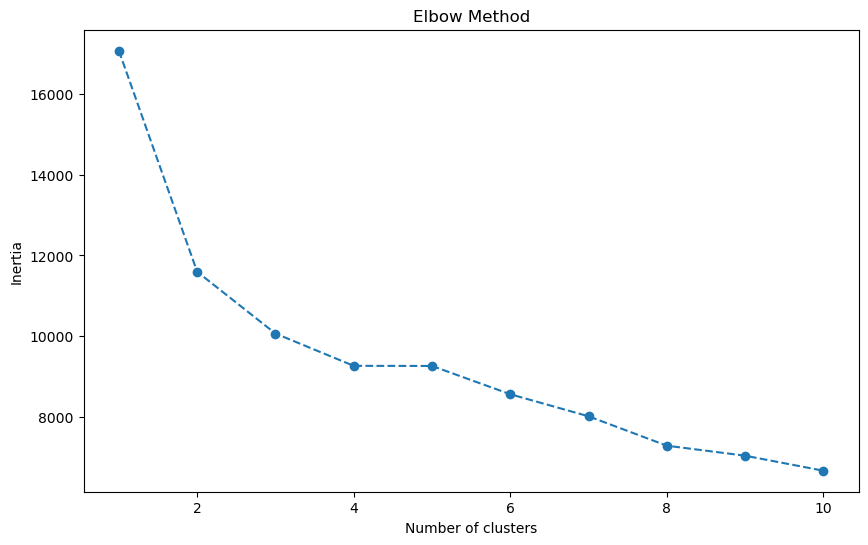

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Determine the optimal number of clusters using the Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features_scaled_df)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
